# Perceptron - Régression - ACHOUR Ayoub

Dans cet exo, on se propose d'implémenter un perceptron pour une régression linéaire y = ax + b par descente de gradient.

On étudie l'influence de alpha et du nombre d'epochs sur la convergence (RMSE)

On compare à la solution optimale moindres carrés (np.polyfit)

In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# la data proposée dans l'énoncé
np.random.seed(44)
taille = 100
sigma = 0.1
noise = sigma * np.random.randn(taille)
x = np.linspace(0, 2, taille)
y = 3 + 2 * x + noise

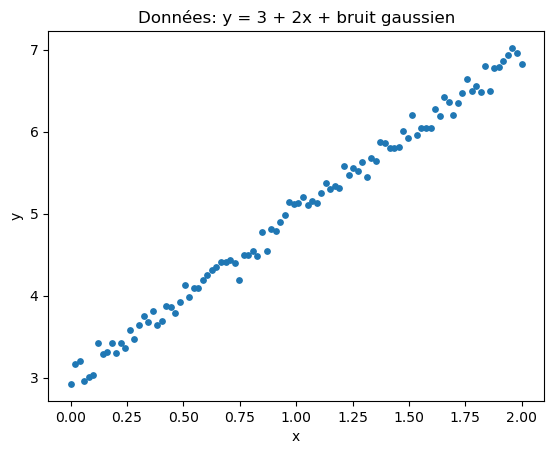

In [58]:
# Visu

plt.figure()
plt.scatter(x, y, s=15)
plt.title("Données: y = 3 + 2x + bruit gaussien")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 1. Formule mathématique de la descente de gradient

- Modèle :

$$
\hat{y_i} = a x_i + b
$$

- Erreur (MSE) : 

$$
MSE(a,b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

- Gradients :
$$
\frac{\partial MSE}{\partial a} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) x_i
$$  

$$
\frac{\partial MSE}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
$$

- Mise à jour (descente de gradient) :
$$
a \leftarrow a - \alpha \frac{\partial MSE}{\partial a}, \quad b \leftarrow b - \alpha \frac{\partial MSE}{\partial b}
$$

N.B : Le $\alpha$ qui figure ici est ce qu'on appelle le learning rate. 

# 2. Traduction en code Python

In [59]:
# Perceptron (régression)
def predict(x, a, b):
    return a * x + b

# Mean Squared Error 
def mse(y_chapeau, y):
    return np.mean((y_chapeau - y)**2)

# Root Mean Squared Error (qu'on utilise plutôt pour avoir une meilleure interprétation de l'erreur)
def rmse(y_chapeau, y):
    return np.sqrt(mse(y_chapeau, y))

# Les gradients de la MSE par rapport à a et b
def gradients_mse(x, y, a, b):
    n = x.size
    y_chapeau = predict(x, a, b)
    e = y_chapeau - y
    da = (2.0/n) * np.sum(e * x)
    db = (2.0/n) * np.sum(e)
    return da, db

In [60]:
# Notre boucle d'apprentissage

# La descente de gradient pour apprendre a et b

def train_grad_descent(x, y, alpha=0.1, epochs=100, a0=0.0, b0=0.0, store_every=10):
    a, b = a0, b0
    hist_rmse = []
    hist_params = []

    for t in range(epochs):
        y_chapeau = predict(x, a, b)
        hist_rmse.append(rmse(y_chapeau, y))

        if t % store_every == 0:
            hist_params.append((t, a, b))

        da, db = gradients_mse(x, y, a, b)
        a = a - alpha * da
        b = b - alpha * db

    hist_params.append((epochs, a, b))
    return a, b, np.array(hist_rmse), hist_params

# 3. Exécution et évolution de la droite de régression



Poids appris : a = 1.998310, b = 2.992506
RMSE finale : 0.100202


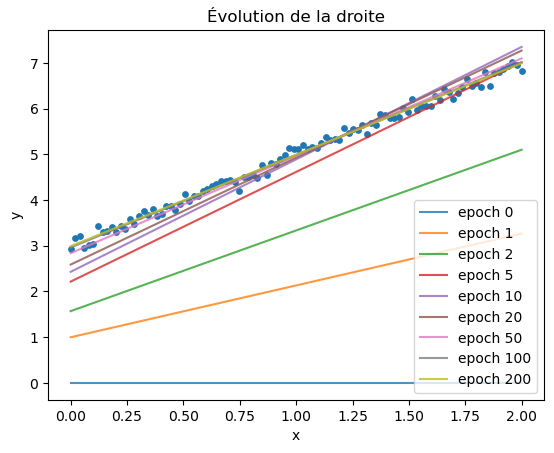

In [61]:
# Visu plus lisible 
alpha = 0.1
epochs = 200

# je stocke plus souvent pour avoir le choix
a_chapeau, b_chapeau, hist_rmse, hist_params = train_grad_descent(
    x, y, alpha=alpha, epochs=epochs, a0=0.0, b0=0.0, store_every=1
)

# les epochs que je choisis de visualiser 
epochs_choisies = [0, 1, 2, 5, 10, 20, 50, 100, 200]

# Je mets hist_params dans un dictionnaire pour récupérer (a,b) à l'epoch t
params_dict = {t: (a_t, b_t) for (t, a_t, b_t) in hist_params}

print(f"Poids appris : a = {a_hat:.6f}, b = {b_hat:.6f}")
print(f"RMSE finale : {hist_rmse[-1]:.6f}")

plt.figure()
plt.scatter(x, y, s=15)

for t in epochs_choisies:
    a_t, b_t = params_dict[t]
    plt.plot(x, predict(x, a_t, b_t), label=f"epoch {t}", alpha=0.8)

plt.title("Évolution de la droite")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


# 4. Expérimentations
## 4.a. Courbes RMSE

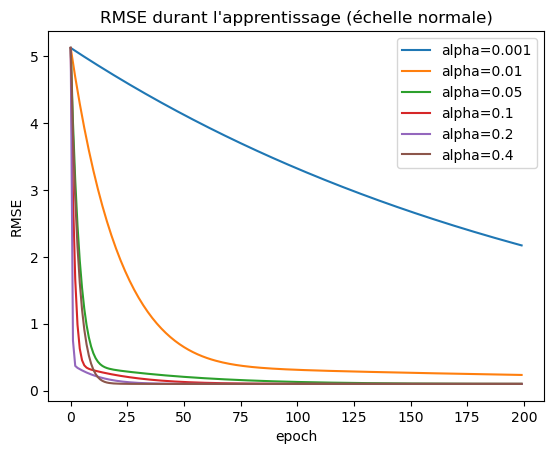

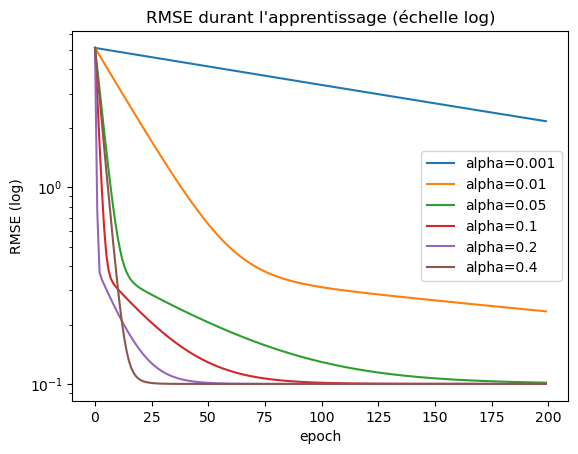

In [62]:
# Le range des alphas choisi, d'ailleurs je me suis arrêté à 0.4 
# car au delà on aura divergence et le graphe devient peu lisible

alphas = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4]
epochs = 200

histories = {}

for a_lr in alphas:
    _, _, h, _ = train_grad_descent(x, 
                                    y, 
                                    alpha=a_lr, 
                                    epochs=epochs, 
                                    a0=0.0, 
                                    b0=0.0, 
                                    store_every=epochs+1
                                    )
                                    
    histories[a_lr] = h

plt.figure()

for a_lr, h in histories.items():
    plt.plot(h, label=f"alpha={a_lr}")


plt.title("RMSE durant l'apprentissage (échelle normale)")
plt.xlabel("epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

plt.figure()

for a_lr, h in histories.items():
    plt.plot(h, label=f"alpha={a_lr}")

plt.yscale("log")
plt.title("RMSE durant l'apprentissage (échelle log)")
plt.xlabel("epoch")
plt.ylabel("RMSE (log)")
plt.legend()
plt.show()


## 4.b. Comparaison avec les moindres carrés

In [63]:
# ls : least squares, j'utilise polyfit ici (déjà manipulée en cours)

a_ls, b_ls = np.polyfit(x, y, 1)
rmse_ls = rmse(predict(x, a_ls, b_ls), y)
print("Moindres carrés: a* =", a_ls, "b* =", b_ls, "RMSE* =", rmse_ls)


Moindres carrés: a* = 1.9971574276170894 b* = 2.9938719395077262 RMSE* = 0.1001997086595315


In [64]:
alphas = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4]
epochs_list = [20, 50, 100, 200, 500]

rows = []
for a_lr in alphas:
    for ep in epochs_list:
        a_chapeau, b_chapeau, h, _ = train_grad_descent(x, 
                                                        y, 
                                                        alpha=a_lr, 
                                                        epochs=ep, 
                                                        a0=0.0, 
                                                        b0=0.0, 
                                                        store_every=ep+1
                                                       )
        
        rmse_final = h[-1]
        rows.append({
            "alpha": a_lr,
            "epochs": ep,
            "a_chapeau": a_chapeau,
            "b_chapeau": b_chapeau,
            "RMSE_final": rmse_final,
            "RMSE_LS": rmse_ls,
            "ratio(RMSE/RMSE_LS)": rmse_final / rmse_ls
        })

df = pd.DataFrame(rows).sort_values(["ratio(RMSE/RMSE_LS)", "alpha", "epochs"])
df


,alpha,epochs,a_chapeau,b_chapeau,RMSE_final,RMSE_LS,ratio(RMSE/RMSE_LS)
29,0.400,500,1.997157,2.993872,0.100200,0.1002,1.000000
24,0.200,500,1.997157,2.993872,0.100200,0.1002,1.000000
28,0.400,200,1.997157,2.993872,0.100200,0.1002,1.000000
19,0.100,500,1.997158,2.993872,0.100200,0.1002,1.000000
27,0.400,100,1.997159,2.993871,0.100200,0.1002,1.000000
23,0.200,200,1.997159,2.993870,0.100200,0.1002,1.000000
14,0.050,500,1.997410,2.993573,0.100200,0.1002,1.000001
26,0.400,50,1.997990,2.992884,0.100201,0.1002,1.000017
22,0.200,100,1.998197,2.992640,0.100202,0.1002,1.000023
18,0.100,200,1.998310,2.992506,0.100202,0.1002,1.000026


In [65]:
df_sorted = df.sort_values("ratio(RMSE/RMSE_LS)")
df_sorted.head(10)

,alpha,epochs,a_chapeau,b_chapeau,RMSE_final,RMSE_LS,ratio(RMSE/RMSE_LS)
29,0.40,500,1.997157,2.993872,0.100200,0.1002,1.000000
24,0.20,500,1.997157,2.993872,0.100200,0.1002,1.000000
28,0.40,200,1.997157,2.993872,0.100200,0.1002,1.000000
19,0.10,500,1.997158,2.993872,0.100200,0.1002,1.000000
27,0.40,100,1.997159,2.993871,0.100200,0.1002,1.000000
23,0.20,200,1.997159,2.993870,0.100200,0.1002,1.000000
14,0.05,500,1.997410,2.993573,0.100200,0.1002,1.000001
26,0.40,50,1.997990,2.992884,0.100201,0.1002,1.000017
22,0.20,100,1.998197,2.992640,0.100202,0.1002,1.000023
18,0.10,200,1.998310,2.992506,0.100202,0.1002,1.000026


In [66]:
best = df_sorted.iloc[0]
best


alpha                    0.400000
epochs                 500.000000
a_chapeau                1.997157
b_chapeau                2.993872
RMSE_final               0.100200
RMSE_LS                  0.100200
ratio(RMSE/RMSE_LS)      1.000000
Name: 29, dtype: float64

## 4.c. Conclusion

**Observation sur $\alpha$ :**

- $\alpha$ trop petit (par exp: 0.001, 0.01), on a la RMSE diminue mais lentement, et même après beaucoup d'epochs on reste au-dessus de l'optimum moindres carrés.
- $\alpha$ plus grand (par exp: 0.1–0.2), on a une convergence plus rapide vers la solution optimale (avec un ratio proche de 1), tant qu'on reste dans une zone plus ou moins stable.

**Observation sur le nombre d'epochs :**

Augmenter les epochs améliore la RMSE jusqu'à un certain rang : une fois proche de l'optimum, les gains deviennent très faibles.

**Meilleur choix d'hyperparamètres :**

Dans mon test, le meilleur compromis est obtenu pour $\alpha = 0.4$ et 500 epochs, pour lesquels la RMSE finale est égale à celle de la solution des moindres carrées (ratio $RMSE/RMSE_{LS} = 1$).

**Existe-t-il un choix fixe optimal a priori ?**

- **Non universellement** : le bon $\alpha$ dépend de l'échelle de $x$, du bruit et de l'initialisation.
- Avec un budget de calcul constant, on cherche généralement le plus grand $\alpha$ qui reste stable, car il atteint plus vite le plateau.